In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import ipywidgets as widgets
#from sklearn.model_selection import train_test_split

# Finns and Alcohol Consumption: Do Seasonal Changes in Weather Affect Our Drinking Habits? 
#### Sini Suihkonen, Outi Savolainen and Fanni Franssila

In [2]:
def load_xls(file_name:str, year: int):
    dataframes = []
    months = ["Tammi", "Helmi", "Maalis", "Huhti", "Touko", "Kesä", "Heinä", "Elo", "Syys", "Loka", "Marras", "Joulu"]
    xls = pd.ExcelFile(file_name)
    for (i, month) in enumerate(months):
        name_of_sheet = f"{month}kuu {year}"
        df = pd.read_excel(xls, name_of_sheet,skiprows=[0,1,2], usecols=("I"))
        # Add month column to the dataframe. For example "Tammikuu2020".
        df[i+1] = pd.concat([df.iloc[3:4], df.iloc[14:15], df.iloc[21:22], df.iloc[34:35], df.iloc[35:36]])
        # Drop rows with NaNs. After this we have only four rows containing total consumption for all types of alchohol.
        df = df.dropna()
        # Remove the first useless row of the dataframe.
        df = df.iloc[:, 1:]
        # Change index names
        df = df.rename(index={3:"Beer", 14:"Wine", 21:"Strong Wine", 34:"Spirits", 35:"Total"})
        dataframes.append(df)
    total = pd.concat(dataframes, axis=1)
    
    return total.T.astype(int)

alc_data2020 = load_xls("Alkoholimyyntitilasto_tammi_joulukuu_2020.xlsx", 2020)
alc_data2019 = load_xls("Alkoholimyyntitilasto_tammi_joulukuu_2019.xlsx", 2019)
alc_data2018 = load_xls("Alkoholimyyntitilasto_tammi_joulukuu_2018.xlsx", 2018)
alc_data2017 = load_xls("Alkoholimyyntitilasto_tammi_joulukuu_2017.xlsx", 2017)

#print(alc_data2017)

<span></span>

<span style="font-family:Arial; font-size:15px;"> Hello everyone and welcome to our blog! The goal of our project was to investigate whether we could find a connection between different weather conditions and alcohol consumption in Finland. Our primary target group is Alcohol retailers, who could use the information to improve their sales numbers. Appropriate health care professionals could also benefit from our work, affecting, for example, better resource allocation.</span> 

## Alcohol Data

<span style="font-family:Arial; font-size:14px;">To start, here is a set of bar plots depicting the monthly Finnish alcohol consumption from the years 2017-2020, to give an overview of the values. We consider the total alcohol consumption, as well as separate consumptions of beer, wine, strong wine and spirits. Therefore, all of these are also presented here.</span>

<span style="font-family:Arial; font-size:14px;">If we look at the figures of alcohol consumption in Finland, we can see some interesting variations - the amounts of consumed alchol types are different, and also the scale differs from figure to figure.</span>

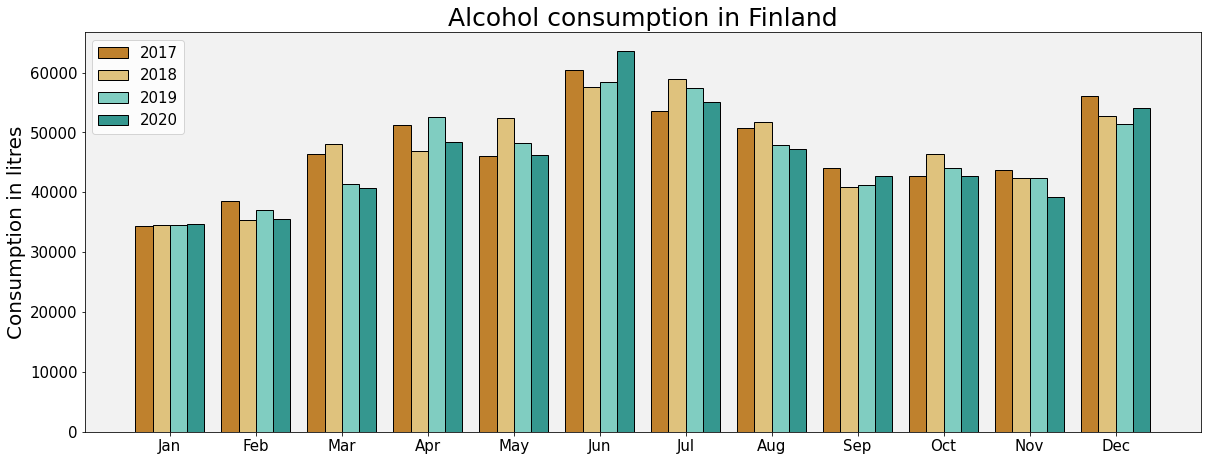

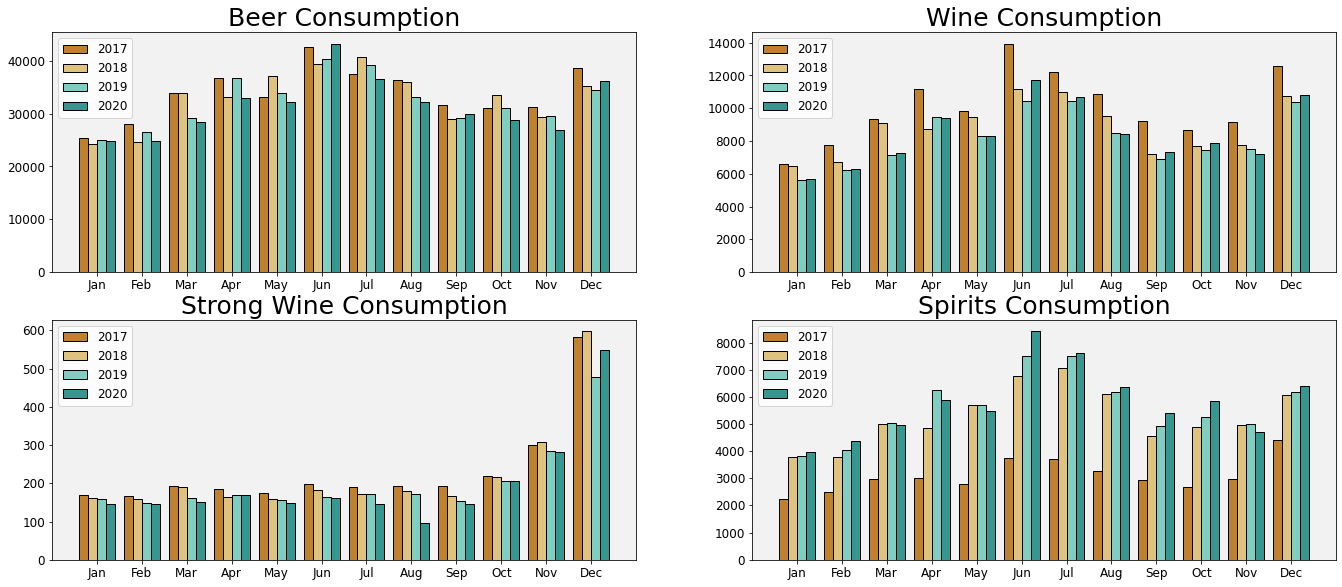

In [3]:
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
total2020 = alc_data2020["Total"].values
total2019 = alc_data2019["Total"].values
total2018 = alc_data2018["Total"].values
total2017 = alc_data2017["Total"].values

beer2020 = alc_data2020["Beer"].values
beer2019 = alc_data2019["Beer"].values
beer2018 = alc_data2018["Beer"].values
beer2017 = alc_data2017["Beer"].values

wine2020 = alc_data2020["Wine"].values
wine2019 = alc_data2019["Wine"].values
wine2018 = alc_data2018["Wine"].values
wine2017 = alc_data2017["Wine"].values

s_wine2020 = alc_data2020["Strong Wine"].values
s_wine2019 = alc_data2019["Strong Wine"].values
s_wine2018 = alc_data2018["Strong Wine"].values
s_wine2017 = alc_data2017["Strong Wine"].values

spirits2020 = alc_data2020["Spirits"].values
spirits2019 = alc_data2019["Spirits"].values
spirits2018 = alc_data2018["Spirits"].values
spirits2017 = alc_data2017["Spirits"].values

color1 = "#bf812d"
color2 = "#dfc27d"
color3 = "#80cdc1"
color4 = "#35978f"
edgeColor = "black"
faceColor = "#f2f2f2"
width = 0.20
bar1 = np.arange(len(labels))
bar2 = [i + width  for i in bar1]
bar3 = [i + width  for i in bar2]
bar4 = [i + width  for i in bar3]

plt.figure(figsize=(20,25))
plt.subplot(3,1,1,facecolor=faceColor)
plt.bar(bar1, total2017, width, label="2017", color=color1, edgecolor=edgeColor)
plt.bar(bar2, total2018, width, label="2018", color=color2, edgecolor=edgeColor)
plt.bar(bar3, total2019, width, label="2019", color=color3, edgecolor=edgeColor)
plt.bar(bar4, total2020, width, label="2020", color=color4, edgecolor=edgeColor)

plt.ylabel("Consumption in litres", fontsize=20)
plt.title("Alcohol consumption in Finland", fontsize=25)
plt.xticks(bar1 + 3*width/2, labels, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(23,15))
plt.subplot(3,2,3,facecolor=faceColor)
plt.bar(bar1, beer2017, width, label="2017", color=color1, edgecolor=edgeColor)
plt.bar(bar2, beer2018, width, label="2018", color=color2, edgecolor=edgeColor)
plt.bar(bar3, beer2019, width, label="2019", color=color3, edgecolor=edgeColor)
plt.bar(bar4, beer2020, width, label="2020", color=color4, edgecolor=edgeColor)

plt.title("Beer Consumption", fontsize=25)
plt.xticks(bar1 + 3*width/2, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.subplot(3,2,4,facecolor=faceColor)
plt.bar(bar1, wine2017, width, label="2017", color=color1, edgecolor=edgeColor)
plt.bar(bar2, wine2018, width, label="2018", color=color2, edgecolor=edgeColor)
plt.bar(bar3, wine2019, width, label="2019", color=color3, edgecolor=edgeColor)
plt.bar(bar4, wine2020, width, label="2020", color=color4, edgecolor=edgeColor)

plt.title("Wine Consumption", fontsize=25)
plt.xticks(bar1 + 3*width/2, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.subplot(3,2,5,facecolor=faceColor)
plt.bar(bar1, s_wine2017, width, label="2017", color=color1, edgecolor=edgeColor)
plt.bar(bar2, s_wine2018, width, label="2018", color=color2, edgecolor=edgeColor)
plt.bar(bar3, s_wine2019, width, label="2019", color=color3, edgecolor=edgeColor)
plt.bar(bar4, s_wine2020, width, label="2020", color=color4, edgecolor=edgeColor)

plt.title("Strong Wine Consumption", fontsize=25)
plt.xticks(bar1 + 3*width/2, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.subplot(3,2,6,facecolor=faceColor)
plt.bar(bar1, spirits2017, width, label="2017", color=color1, edgecolor=edgeColor)
plt.bar(bar2, spirits2018, width, label="2018", color=color2, edgecolor=edgeColor)
plt.bar(bar3, spirits2019, width, label="2019", color=color3, edgecolor=edgeColor)
plt.bar(bar4, spirits2020, width, label="2020", color=color4, edgecolor=edgeColor)

plt.title("Spirits Consumption", fontsize=25)
plt.xticks(bar1 + 3*width/2, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [4]:
# WEATHER DATA
def load_csv(file_name:str):
    df_weather = pd.read_csv(file_name)

    # replace negative snow depth values
    df_weather["Lumensyvyys (cm)"].replace({-1: 0}, inplace=True)

    # Translate relevant column names into English
    df_weather = df_weather.rename(columns={"Kk": "Month", "Pilvien määrä (1/8)": "Cloud cover (1/8)", "Ilmanpaine (msl) (hPa)": "Air pressure(msl) (hPa)",
                                        "Sademäärä (mm)": "Precipitation (mm/h)", "Lumensyvyys (cm)": "Snow depth (cm)", "Ilman lämpötila (degC)": "Air temperature (degC)",
                                        "Tuulen nopeus (m/s)": "Wind speed (m/s)"})

    # Some random values were missing. Filling method 
    # ffill: propagate last valid observation forward to next valid backfill 
    df_weather = df_weather.fillna(method="ffill")
    #count column means by month
    df_mean = df_weather.groupby("Month").mean()

    # drop year and day column
    df_mean = df_mean.iloc[: , 2:]
    if file_name == 'weather2021-JYV.csv' or file_name == 'weather2021-OUL.csv' or file_name == 'weather2021-HEL.csv':
      return df_mean
    # limit columns here 
    col = [0,1,2,5,6,11]
    df_mean = df_mean.iloc[:,col]

    return df_mean

# SUN DATA
def load_sun_csv(file_name:str):
    df_sun = pd.read_csv(file_name, sep=",")

    # Drop the time zone, year, day and time of day
    df_sun = df_sun.drop(["Aikavyöhyke", "Vuosi", "Pv", "Klo"], axis=1)

    # Translate column names into English
    df_sun = df_sun.rename(columns={"Kk": "Month", "Paisteaika (s)": "Sunshine duration (s/min)"})

    # Take monthly mean for sunlight
    df_sun = df_sun.groupby("Month").mean()

    return df_sun


In [5]:
#Jyväskylä - Airport
weatherdata_JYV_2020 = load_csv("weather2020-JYV.csv")
weatherdata_JYV_2019 = load_csv("weather2019-JYV.csv")
weatherdata_JYV_2018 = load_csv("weather2018-JYV.csv")
weatherdata_JYV_2017 = load_csv("weather2017-JYV.csv")
weatherdata_JYV_2021 = load_csv("weather2021-JYV.csv")

#Helsinki - Kumpula
weatherdata_HEL_2020 = load_csv("weather2020-HEL.csv")
weatherdata_HEL_2019 = load_csv("weather2019-HEL.csv")
weatherdata_HEL_2018 = load_csv("weather2018-HEL.csv")
weatherdata_HEL_2017 = load_csv("weather2017-HEL.csv")
weatherdata_HEL_2021 = load_csv("weather2021-HEL.csv")
#Oulu - Pellonpää
weatherdata_OULU_2020 = load_csv("weather2020-OULU.csv")
weatherdata_OULU_2019 = load_csv("weather2019-OULU.csv")
weatherdata_OULU_2018 = load_csv("weather2018-OULU.csv")
weatherdata_OULU_2017 = load_csv("weather2017-OULU.csv")
weatherdata_OULU_2021 = load_csv("weather2021-OUL.csv")

weatherdata_All_2021 = (weatherdata_JYV_2021 + weatherdata_HEL_2021 + weatherdata_OULU_2021) / 3.0
weatherdata_All_2020 = (weatherdata_JYV_2020 + weatherdata_HEL_2020 + weatherdata_OULU_2020) / 3.0
weatherdata_All_2019 = (weatherdata_JYV_2019 + weatherdata_HEL_2019 + weatherdata_OULU_2019) / 3.0
weatherdata_All_2018 = (weatherdata_JYV_2018 + weatherdata_HEL_2018 + weatherdata_OULU_2018) / 3.0
weatherdata_All_2017 = (weatherdata_JYV_2017 + weatherdata_HEL_2017 + weatherdata_OULU_2017) / 3.0

weatherdata_JYV_2020 = weatherdata_JYV_2020.merge(load_sun_csv("sun2020-JYV.csv"), on="Month")
weatherdata_JYV_2019 = weatherdata_JYV_2019.merge(load_sun_csv("sun2019-JYV.csv"), on="Month")
weatherdata_JYV_2018 = weatherdata_JYV_2018.merge(load_sun_csv("sun2018-JYV.csv"), on="Month")
weatherdata_JYV_2017 = weatherdata_JYV_2017.merge(load_sun_csv("sun2017-JYV.csv"), on="Month")
weatherdata_JYV_2021 = weatherdata_JYV_2021.merge(load_sun_csv("sun2021-JYV.csv"), on="Month")

weatherdata_HEL_2020 = weatherdata_HEL_2020.merge(load_sun_csv("sun2020-HEL.csv"), on="Month")
weatherdata_HEL_2019 = weatherdata_HEL_2019.merge(load_sun_csv("sun2019-HEL.csv"), on="Month")
weatherdata_HEL_2018 = weatherdata_HEL_2018.merge(load_sun_csv("sun2018-HEL.csv"), on="Month")
weatherdata_HEL_2017 = weatherdata_HEL_2017.merge(load_sun_csv("sun2017-HEL.csv"), on="Month")
weatherdata_HEL_2021 = weatherdata_HEL_2021.merge(load_sun_csv("sun2021-HEL.csv"), on="Month")

weatherdata_All_2021_SUN = (weatherdata_JYV_2021 + weatherdata_HEL_2021)/2.0
weatherdata_All_2020_SUN = (weatherdata_JYV_2020 + weatherdata_HEL_2020)/2.0
weatherdata_All_2019_SUN = (weatherdata_JYV_2019 + weatherdata_HEL_2019)/2.0
weatherdata_All_2018_SUN = (weatherdata_JYV_2018 + weatherdata_HEL_2018)/2.0
weatherdata_All_2017_SUN = (weatherdata_JYV_2017 + weatherdata_HEL_2017)/2.0

#weatherdata_All_2021.head()

In [6]:
#Weather comparison visualizations
#Jyväskylä 2017-2020
def get_Jyvaskyla():
    jyv = []
    for el in weatherdata_JYV_2017.columns:
          jyv.append(pd.concat([weatherdata_JYV_2017[el],
          weatherdata_JYV_2018[el],
          weatherdata_JYV_2019[el],
          weatherdata_JYV_2020[el]],axis=1, keys=["2017","2018","2019","2020"]))
    colors = ["#bf812d", "#dfc27d","#80cdc1","#35978f"]
    edgeColor = "#004C6D"
    width=0.7
    fig, axes = plt.subplots(4, 2, figsize=(20,20))
    jyv[0].plot.bar(title="Cloud cover (1/8)", ax=axes[0,0],color= colors, edgecolor=edgeColor, width= width)
    jyv[1].plot.bar(title="Air pressure(msl) (hPa)", ax=axes[0,1],color= colors, edgecolor=edgeColor, width= width)
    #change air pressure scale to make the variations visible 
    axes[0,1].set_ylim(990, 1030)
    jyv[2].plot.bar(title="Precipitation (mm/h)", ax=axes[1,0],color= colors, edgecolor=edgeColor, width= width)
    jyv[3].plot.bar(title="Snow depth (cm)", ax=axes[1,1],color= colors, edgecolor=edgeColor, width= width)
    jyv[4].plot.line(title="Air temperature (degC)", ax=axes[2,0],color= colors)
    jyv[5].plot.bar(title="Wind speed (m/s)", ax=axes[2,1],color= colors, edgecolor=edgeColor, width= width)
    jyv[6].plot.line(title="Sunshine duration (s/min)", ax=axes[3,0],color= colors)

    #delete remaining empty plots
    fig.delaxes(ax=axes[3,1])

    fig.suptitle("Weather Jyväskylä 2017-2020", fontsize=20)

    plt.tight_layout()
    plt.show()

In [7]:
#Helsinki 2017-2020
def get_Helsinki():
    hel = []
    for el in weatherdata_HEL_2017.columns:
          hel.append(pd.concat([weatherdata_HEL_2017[el],
          weatherdata_HEL_2018[el],
          weatherdata_HEL_2019[el],
          weatherdata_HEL_2020[el]],axis=1, keys=["2017","2018","2019","2020"]))

    colors = ["#bf812d", "#dfc27d","#80cdc1","#35978f"]
    edgeColor = "#004C6D"
    width=0.7
    fig, axes = plt.subplots(4, 2, figsize=(20,20))
    hel[0].plot.bar(title="Cloud cover (1/8)", ax=axes[0,0],color= colors, edgecolor=edgeColor, width= width)
    hel[1].plot.bar(title="Air pressure(msl) (hPa)", ax=axes[0,1],color= colors, edgecolor=edgeColor, width= width)
    #change air pressure scale to make the variation more visible 
    axes[0,1].set_ylim(990, 1030)
    hel[2].plot.bar(title="Precipitation (mm/h)", ax=axes[1,0],color= colors, edgecolor=edgeColor, width= width)
    hel[3].plot.bar(title="Snow depth (cm)", ax=axes[1,1],color= colors, edgecolor=edgeColor, width= width)
    hel[4].plot.line(title="Air temperature (degC)", ax=axes[2,0],color= colors)
    hel[5].plot.bar(title="Wind speed (m/s)", ax=axes[2,1],color= colors, edgecolor=edgeColor, width= width)
    hel[6].plot.line(title="Sunshine duration (s/min)", ax=axes[3,0],color= colors)

    #delete remaining empty plots
    fig.delaxes(ax=axes[3,1])

    fig.suptitle("Weather Helsinki 2017-2020", fontsize=20)

    plt.tight_layout()
    plt.show()

In [8]:
#Oulu 2017-2020
def get_Oulu():
    oulu = []
    for el in weatherdata_OULU_2017.columns:
          oulu.append(pd.concat([weatherdata_OULU_2017[el],
          weatherdata_OULU_2018[el],
          weatherdata_OULU_2019[el],
          weatherdata_OULU_2020[el]],axis=1, keys=["2017","2018","2019","2020"]))
    colors = ["#bf812d", "#dfc27d","#80cdc1","#35978f"]
    edgeColor = "#004C6D"
    width=0.7
    fig, axes = plt.subplots(3, 2, figsize=(20,15))
    oulu[0].plot.bar(title="Cloud cover (1/8)", ax=axes[0,0],color= colors, edgecolor=edgeColor, width= width)
    oulu[1].plot.bar(title="Air pressure(msl) (hPa)", ax=axes[0,1],color= colors, edgecolor=edgeColor, width= width)
    #change air pressure scale to make the variation more visible 
    axes[0,1].set_ylim(990, 1030)
    oulu[2].plot.bar(title="Precipitation (mm/h)", ax=axes[1,0],color= colors, edgecolor=edgeColor, width= width)
    oulu[3].plot.bar(title="Snow depth (cm)", ax=axes[1,1],color= colors, edgecolor=edgeColor, width= width)
    oulu[4].plot.line(title="Air temperature (degC)", ax=axes[2,0],color= colors)
    oulu[5].plot.bar(title="Wind speed (m/s)", ax=axes[2,1],color= colors, edgecolor=edgeColor, width= width)

    fig.suptitle("Weather Oulu 2017-2020", fontsize=20)

    plt.tight_layout()
    plt.show()

In [9]:
#Averages between cities

#Jyväskylä, Helsinki, Oulu 2017-2020, sunshine duration dropped
def get_All():
    w_total2017 = weatherdata_All_2017.astype(float)
    w_total2018 = weatherdata_All_2018.astype(float)
    w_total2019 = weatherdata_All_2019.astype(float)
    w_total2020 = weatherdata_All_2020.astype(float)
    colors = ["#bf812d", "#dfc27d","#80cdc1","#35978f"]
    edgeColor = "#004C6D"
    width=0.7
    avg = []
    for el in w_total2017.columns:
          avg.append(pd.concat([w_total2017[el],
          w_total2018[el],
          w_total2019[el],
          w_total2020[el]],axis=1, keys=["2017","2018","2019","2020"]))

    fig, axes = plt.subplots(3, 2, figsize=(20,15))
    avg[0].plot.bar(title="Cloud cover (1/8)", ax=axes[0,0],color= colors, edgecolor=edgeColor, width= width)
    avg[1].plot.bar(title="Air pressure(msl) (hPa)", ax=axes[0,1],color= colors, edgecolor=edgeColor, width= width)
    #change air pressure scale to make the variation more visible 
    axes[0,1].set_ylim(990, 1030)
    avg[2].plot.bar(title="Precipitation (mm/h)", ax=axes[1,0],color= colors, edgecolor=edgeColor, width= width)
    avg[3].plot.bar(title="Snow depth (cm)", ax=axes[1,1],color= colors, edgecolor=edgeColor, width= width)
    avg[4].plot.line(title="Air temperature (degC)", ax=axes[2,0],color= colors)
    avg[5].plot.bar(title="Wind speed (m/s)", ax=axes[2,1],color= colors, edgecolor=edgeColor, width= width)

    fig.suptitle("Weather Averages 2017-2020 without sunshine duration", fontsize=20)

    plt.tight_layout()
    plt.show()

In [10]:
#Averages between cities
#Jyväskylä, Helsinki
def get_All_Sunshine():
    w_total2017 = weatherdata_All_2017_SUN.astype(float)
    w_total2018 = weatherdata_All_2018_SUN.astype(float)
    w_total2019 = weatherdata_All_2019_SUN.astype(float)
    w_total2020 = weatherdata_All_2020_SUN.astype(float)
 
    colors = ["#bf812d", "#dfc27d","#80cdc1","#35978f"]
    edgeColor = "#004C6D"
    width = 0.7
    avg = []
    for el in w_total2017.columns:
          avg.append(pd.concat([w_total2017[el],
          w_total2018[el],
          w_total2019[el],
          w_total2020[el]],axis=1, keys=["2017","2018","2019","2020"]))

    fig, axes = plt.subplots(4, 2, figsize=(20,20))
    avg[0].plot.bar(title="Cloud cover (1/8)", ax=axes[0,0], color= colors, edgecolor=edgeColor, width= width)
    avg[1].plot.bar(title="Air pressure(msl) (hPa)", ax=axes[0,1], color= colors, edgecolor=edgeColor, width= width)
    #change air pressure scale to make the variation more visible 
    axes[0,1].set_ylim(990, 1030)
    avg[2].plot.bar(title="Precipitation (mm/h)", ax=axes[1,0], color= colors, edgecolor=edgeColor, width= width)
    avg[3].plot.bar(title="Snow depth (cm)", ax=axes[1,1], color= colors, edgecolor=edgeColor, width= width)
    avg[4].plot.line(title="Air temperature (degC)", ax=axes[2,0], color= colors)
    avg[5].plot.bar(title="Wind speed (m/s)", ax=axes[2,1], color= colors, edgecolor=edgeColor, width= width)
    avg[6].plot.line(title="Sunshine duration (s/min)", ax=axes[3,0],color= colors)
    fig.suptitle("Weather Averages 2017-2020 with sunshine duration", fontsize=20)
    fig.delaxes(ax=axes[3,1])

    plt.tight_layout()
    plt.show()

In [22]:
from ipywidgets import Layout
city = widgets.Select(
  options = ['Oulu','Jyväskylä','Helsinki',
              'Averages Jyväskylä-Helsinki', 'Averages Oulu-Jyväskylä-Helsinki'],
  description = "Select",
  disabled= False,
  layout= Layout(width='30%', height='80px')
)
def change_figure(city):
  if city == 'Oulu':
    get_Oulu()
  if city == 'Jyväskylä':
    get_Jyvaskyla()
  if city == 'Helsinki':
    get_Helsinki()
  if city == 'Averages Jyväskylä-Helsinki':
    get_All_Sunshine()
  if city == 'Averages Oulu-Jyväskylä-Helsinki':
    get_All()

## Weather data

Below, we have included graphs presenting the average weather conditions in Oulu, Jyväskylä and Helsinki separately and combined between the years 2017 to 2020. ??Helsinki and Jyväskylä have collected weather data for sunshine duration. Unfortunately, collection for sunshine duration data started first at 2019 on one station near Oulu.??

In [23]:
widgets.interactive(change_figure, city = city)

interactive(children=(Select(description='Select', layout=Layout(height='80px', width='30%'), options=('Oulu',…

In [13]:
def rescale(series: pd.Series):
  return (series-series.mean())/(series.std())

In [14]:
# Rescale weather data
columns_to_scale=["Cloud cover (1/8)", "Air pressure(msl) (hPa)", "Precipitation (mm/h)", "Snow depth (cm)",
                  "Air temperature (degC)", "Wind speed (m/s)", "Sunshine duration (s/min)"]

distribution_HEL = pd.DataFrame(columns=["mean", "std"], index=columns_to_scale)
distribution_JYV = pd.DataFrame(columns=["mean", "std"], index=columns_to_scale)
distribution_OULU = pd.DataFrame(columns=["mean", "std"], index=columns_to_scale)
distribution_total = pd.DataFrame(columns=["mean", "std"], index=columns_to_scale)

for col in columns_to_scale:
  weatherdata_HEL_2017['s'+ col] = rescale(weatherdata_HEL_2017[col])
  weatherdata_HEL_2018['s'+ col] = rescale(weatherdata_HEL_2018[col])
  weatherdata_HEL_2019['s'+ col] = rescale(weatherdata_HEL_2019[col])
  weatherdata_HEL_2020['s'+ col] = rescale(weatherdata_HEL_2020[col])
  distribution_HEL.loc[col] = [pd.concat([weatherdata_HEL_2017[col], weatherdata_HEL_2018[col], \
                                weatherdata_HEL_2019[col], weatherdata_HEL_2020[col]], ignore_index=True).astype(float).mean(), \
                                pd.concat([weatherdata_HEL_2017[col], weatherdata_HEL_2018[col], \
                                weatherdata_HEL_2019[col], weatherdata_HEL_2020[col]], ignore_index=True).astype(float).std()]

  weatherdata_JYV_2017['s'+ col] = rescale(weatherdata_JYV_2017[col])
  weatherdata_JYV_2018['s'+ col] = rescale(weatherdata_JYV_2018[col])
  weatherdata_JYV_2019['s'+ col] = rescale(weatherdata_JYV_2019[col])
  weatherdata_JYV_2020['s'+ col] = rescale(weatherdata_JYV_2020[col])
  distribution_JYV.loc[col] = [pd.concat([weatherdata_JYV_2017[col], weatherdata_JYV_2018[col], \
                                weatherdata_JYV_2019[col], weatherdata_JYV_2020[col]], ignore_index=True).astype(float).mean(), \
                                pd.concat([weatherdata_JYV_2017[col], weatherdata_JYV_2018[col], \
                                weatherdata_JYV_2019[col], weatherdata_JYV_2020[col]], ignore_index=True).astype(float).std()]
  weatherdata_All_2017_SUN['s'+ col] = rescale(weatherdata_All_2017_SUN[col])
  weatherdata_All_2018_SUN['s'+ col] = rescale(weatherdata_All_2018_SUN[col])
  weatherdata_All_2019_SUN['s'+ col] = rescale(weatherdata_All_2019_SUN[col])
  weatherdata_All_2020_SUN['s'+ col] = rescale(weatherdata_All_2020_SUN[col])
  weatherdata_All_2021_SUN['s'+ col] = rescale(weatherdata_All_2021_SUN[col])
  if col != "Sunshine duration (s/min)":
    weatherdata_OULU_2017['s'+ col] = rescale(weatherdata_OULU_2017[col]) 
    weatherdata_OULU_2018['s'+ col] = rescale(weatherdata_OULU_2018[col])
    weatherdata_OULU_2019['s'+ col] = rescale(weatherdata_OULU_2019[col])
    weatherdata_OULU_2020['s'+ col] = rescale(weatherdata_OULU_2020[col])
    distribution_OULU.loc[col] = [pd.concat([weatherdata_OULU_2017[col], weatherdata_OULU_2018[col], \
                                weatherdata_OULU_2019[col], weatherdata_OULU_2020[col]], ignore_index=True).astype(float).mean(), \
                                pd.concat([weatherdata_OULU_2017[col], weatherdata_OULU_2018[col], \
                                weatherdata_OULU_2019[col], weatherdata_OULU_2020[col]], ignore_index=True).astype(float).std()]
    
    weatherdata_All_2017['s'+ col] = rescale(weatherdata_All_2017[col])
    weatherdata_All_2018['s'+ col] = rescale(weatherdata_All_2018[col])
    weatherdata_All_2019['s'+ col] = rescale(weatherdata_All_2019[col])
    weatherdata_All_2020['s'+ col] = rescale(weatherdata_All_2020[col])
    weatherdata_All_2021['s'+ col] = rescale(weatherdata_All_2021[col])
    distribution_total.loc[col] = [pd.concat([weatherdata_All_2017[col], weatherdata_All_2018[col], \
                                weatherdata_All_2019[col], weatherdata_All_2020[col]], \
                                ignore_index=True).astype(float).mean(), \
                                pd.concat([weatherdata_All_2017[col], weatherdata_All_2018[col], \
                                weatherdata_All_2019[col], weatherdata_All_2020[col]], ignore_index=True).astype(float).std()]
  else:
    distribution_total.loc[col] = [pd.concat([weatherdata_All_2017_SUN[col], weatherdata_All_2018_SUN[col], \
                                weatherdata_All_2019_SUN[col], weatherdata_All_2020_SUN[col]], ignore_index=True).astype(float).mean(), \
                                pd.concat([weatherdata_All_2017_SUN[col], weatherdata_All_2018_SUN[col], \
                                weatherdata_All_2019_SUN[col], weatherdata_All_2020_SUN[col]], ignore_index=True).astype(float).std()]

  


In [15]:
def process_data_for_lr(alc_column: str, sun):
    alc_total2020 = alc_data2020[alc_column]
    alc_total2019 = alc_data2019[alc_column]
    alc_total2018 = alc_data2018[alc_column]
    alc_total2017 = alc_data2017[alc_column]
    y = alc_total2017.append([alc_total2018, alc_total2019, alc_total2020], ignore_index=True).astype(float)

    if sun == False:
      # Combine weather data. Sunshine duration is excluded.
        w_total2020 = weatherdata_All_2020
        w_total2019 = weatherdata_All_2019
        w_total2018 = weatherdata_All_2018
        w_total2017 = weatherdata_All_2017
    else:
        # Combine weather data, Oulu excluded
        w_total2020 = weatherdata_All_2020_SUN
        w_total2019 = weatherdata_All_2019_SUN
        w_total2018 = weatherdata_All_2018_SUN
        w_total2017 = weatherdata_All_2017_SUN

    X = pd.concat([w_total2017, w_total2018, w_total2019, w_total2020], ignore_index=True).astype(float)

    return (X, y)

In [16]:
# LINEAR REGRESSION OF WHOLE DATA
# statsmodels version

def linear_regression(alc_type: str, sun=False):   
    (X, y) = process_data_for_lr(alc_type, sun)
    df = pd.concat([y, X], axis=1).rename({alc_type: "Alcohol"}, axis=1)
    if sun == True:
        #model = "Alcohol ~ Q('sCloud cover (1/8)') + Q('sAir pressure(msl) (hPa)') + Q('sPrecipitation (mm)') + Q('sSnow depth (cm)') + Q('sAir temperature (degC)') + Q('sWind speed (m/s)') + Q('sSunshine duration (s/min)')"
        model = """Alcohol ~ Q('sCloud cover (1/8)') + Q('sAir pressure(msl) (hPa)') + Q('sPrecipitation (mm/h)') 
                + Q('sSnow depth (cm)') + Q('sAir temperature (degC)') + Q('sWind speed (m/s)') + Q('sSunshine duration (s/min)')
                + Q('sCloud cover (1/8)'):Q('sAir pressure(msl) (hPa)') + Q('sCloud cover (1/8)'):Q('sPrecipitation (mm/h)')
                + Q('sCloud cover (1/8)'):Q('sSnow depth (cm)') + Q('sCloud cover (1/8)'):Q('sAir temperature (degC)')
                + Q('sCloud cover (1/8)'):Q('sWind speed (m/s)') + Q('sCloud cover (1/8)'):Q('sSunshine duration (s/min)')
                + Q('sAir pressure(msl) (hPa)'):Q('sPrecipitation (mm/h)') + Q('sAir pressure(msl) (hPa)'):Q('sSnow depth (cm)')
                + Q('sAir pressure(msl) (hPa)'):Q('sAir temperature (degC)') + Q('sAir pressure(msl) (hPa)'):Q('sWind speed (m/s)')
                + Q('sAir pressure(msl) (hPa)'):Q('sSunshine duration (s/min)') + Q('sPrecipitation (mm/h)'):Q('sSnow depth (cm)')
                + Q('sPrecipitation (mm/h)'):Q('sAir temperature (degC)') + Q('sPrecipitation (mm/h)'):Q('sWind speed (m/s)')
                + Q('sPrecipitation (mm/h)'):Q('sSunshine duration (s/min)') + Q('sSnow depth (cm)'):Q('sAir temperature (degC)')
                + Q('sSnow depth (cm)'):Q('sWind speed (m/s)') + Q('sSnow depth (cm)'):Q('sSunshine duration (s/min)')
                + Q('sAir temperature (degC)'):Q('sWind speed (m/s)') + Q('sAir temperature (degC)'):Q('sSunshine duration (s/min)')
                + Q('sWind speed (m/s)'):Q('sSunshine duration (s/min)')
        """
    else:
        #model = "Alcohol ~ Q('sCloud cover (1/8)') + Q('sAir pressure(msl) (hPa)') + Q('sPrecipitation (mm)') + Q('sSnow depth (cm)') + Q('sAir temperature (degC)') + Q('sWind speed (m/s)')"
        model = """Alcohol ~ Q('sCloud cover (1/8)') + Q('sAir pressure(msl) (hPa)') + Q('sPrecipitation (mm/h)') 
                + Q('sSnow depth (cm)') + Q('sAir temperature (degC)') + Q('sWind speed (m/s)')
                + Q('sCloud cover (1/8)'):Q('sAir pressure(msl) (hPa)') + Q('sCloud cover (1/8)'):Q('sPrecipitation (mm/h)')
                + Q('sCloud cover (1/8)'):Q('sSnow depth (cm)') + Q('sCloud cover (1/8)'):Q('sAir temperature (degC)')
                + Q('sCloud cover (1/8)'):Q('sWind speed (m/s)')
                + Q('sAir pressure(msl) (hPa)'):Q('sPrecipitation (mm/h)') + Q('sAir pressure(msl) (hPa)'):Q('sSnow depth (cm)')
                + Q('sAir pressure(msl) (hPa)'):Q('sAir temperature (degC)') + Q('sAir pressure(msl) (hPa)'):Q('sWind speed (m/s)')
                + Q('sPrecipitation (mm/h)'):Q('sSnow depth (cm)')
                + Q('sPrecipitation (mm/h)'):Q('sAir temperature (degC)') + Q('sPrecipitation (mm/h)'):Q('sWind speed (m/s)')
                + Q('sSnow depth (cm)'):Q('sAir temperature (degC)')
                + Q('sSnow depth (cm)'):Q('sWind speed (m/s)')
                + Q('sAir temperature (degC)'):Q('sWind speed (m/s)')
        """
    #model = "Alcohol ~ Cloud cover (1/8) + Air pressure(msl) (hPa) + Precipitation (mm) + Snow depth (cm) + Air temperature (degC) + Wind speed (m/s)"
    fit=smf.ols(model, data=df).fit()
    return (fit.summary(), fit.params, fit)

# For analysis purposes
#print(linear_regression("Total")[0])
#print(linear_regression("Beer")[0])
#print(linear_regression("Wine")[0])
#print(linear_regression("Strong Wine")[0])
#print(linear_regression("Spirits")[0])
#print(linear_regression("Total", sun=True)[0])
#print(linear_regression("Beer", sun=True)[0])
#print(linear_regression("Wine", sun=True)[0])
#print(linear_regression("Strong Wine", sun=True)[0])
#print(linear_regression("Spirits", sun=True)[0])

In [17]:
# Denormalize input. If input is dataframe, give series=False and don't give series_name. 
# If input is a series, give series=True and the name of the weather feature (without the "s") as series_name.
def denormalize(data, series=False, series_name=""):
    if not series:
        for col in len(data.columns.tolist()):
            data.iloc[col] = data.iloc[col] * distribution_total.iloc[col]["std"] + distribution_total.iloc[col]["mean"]
        return data
    return data * distribution_total.loc[series_name]["std"] + distribution_total.loc[series_name]["mean"]

In [18]:
def predict_alcohol(alc_type="Total", cloud=distribution_total.iloc[0]["mean"], pressure=distribution_total.iloc[1]["mean"], rain=distribution_total.iloc[2]["mean"], snow=distribution_total.iloc[3]["mean"], temp=distribution_total.iloc[4]["mean"], wind=distribution_total.iloc[5]["mean"], sun=distribution_total.iloc[6]["mean"]):

    fit = linear_regression(alc_type, sun=True)[2]
    params = fit.params
    # Normalize the given values
    cloud = (cloud - distribution_total.iloc[0]["mean"]) / ( distribution_total.iloc[0]["std"])
    pressure = (pressure - distribution_total.iloc[1]["mean"]) / ( distribution_total.iloc[1]["std"])
    rain = (rain - distribution_total.iloc[2]["mean"]) / (distribution_total.iloc[2]["std"])
    snow = (snow - distribution_total.iloc[3]["mean"]) / ( distribution_total.iloc[3]["std"])
    temp = (temp - distribution_total.iloc[4]["mean"]) / (distribution_total.iloc[4]["std"])
    wind = (wind - distribution_total.iloc[5]["mean"]) / ( distribution_total.iloc[5]["std"])
    sun = (sun - distribution_total.iloc[6]["mean"]) / (distribution_total.iloc[6]["std"])
    point = pd.DataFrame({"sCloud cover (1/8)": cloud, "sAir pressure(msl) (hPa)": pressure, "sPrecipitation (mm/h)": rain, \
            "sSnow depth (cm)": snow, "sAir temperature (degC)": temp, "sWind speed (m/s)": wind, "sSunshine duration (s/min)": sun}, index=[0])
    predicted = float(fit.predict(point)[0])

    return predicted


#print(predict_alcohol("Total", 5, 1000, 0.1, 2, -2, 3.5, 10))

## Results

<span style="font-family:Arial; font-size:14px;">Below, we present some results based on the relationship we have found between alcohol consumption and the chosen weather features. The results are shown in the form of plots that depict how changes in each weather feature affect the quantity of alcohol consumed. For example, it can be seen that the alcohol consumption of all different types of alcohol drinks considered seems to rise as the temperature rises. The left side of the graph column represents the data with the sunshine weather condition included in the data, and the right side without it.</span>

In [19]:
def get_values(reg_p: tuple, field_name: str, col: int):
  slope = reg_p[field_name] / distribution_total.iloc[col]["std"]
  # overallcoef - coef * (mean / std)
  intercept = reg_p.Intercept - slope * distribution_total.iloc[col]["mean"]
  return intercept, slope

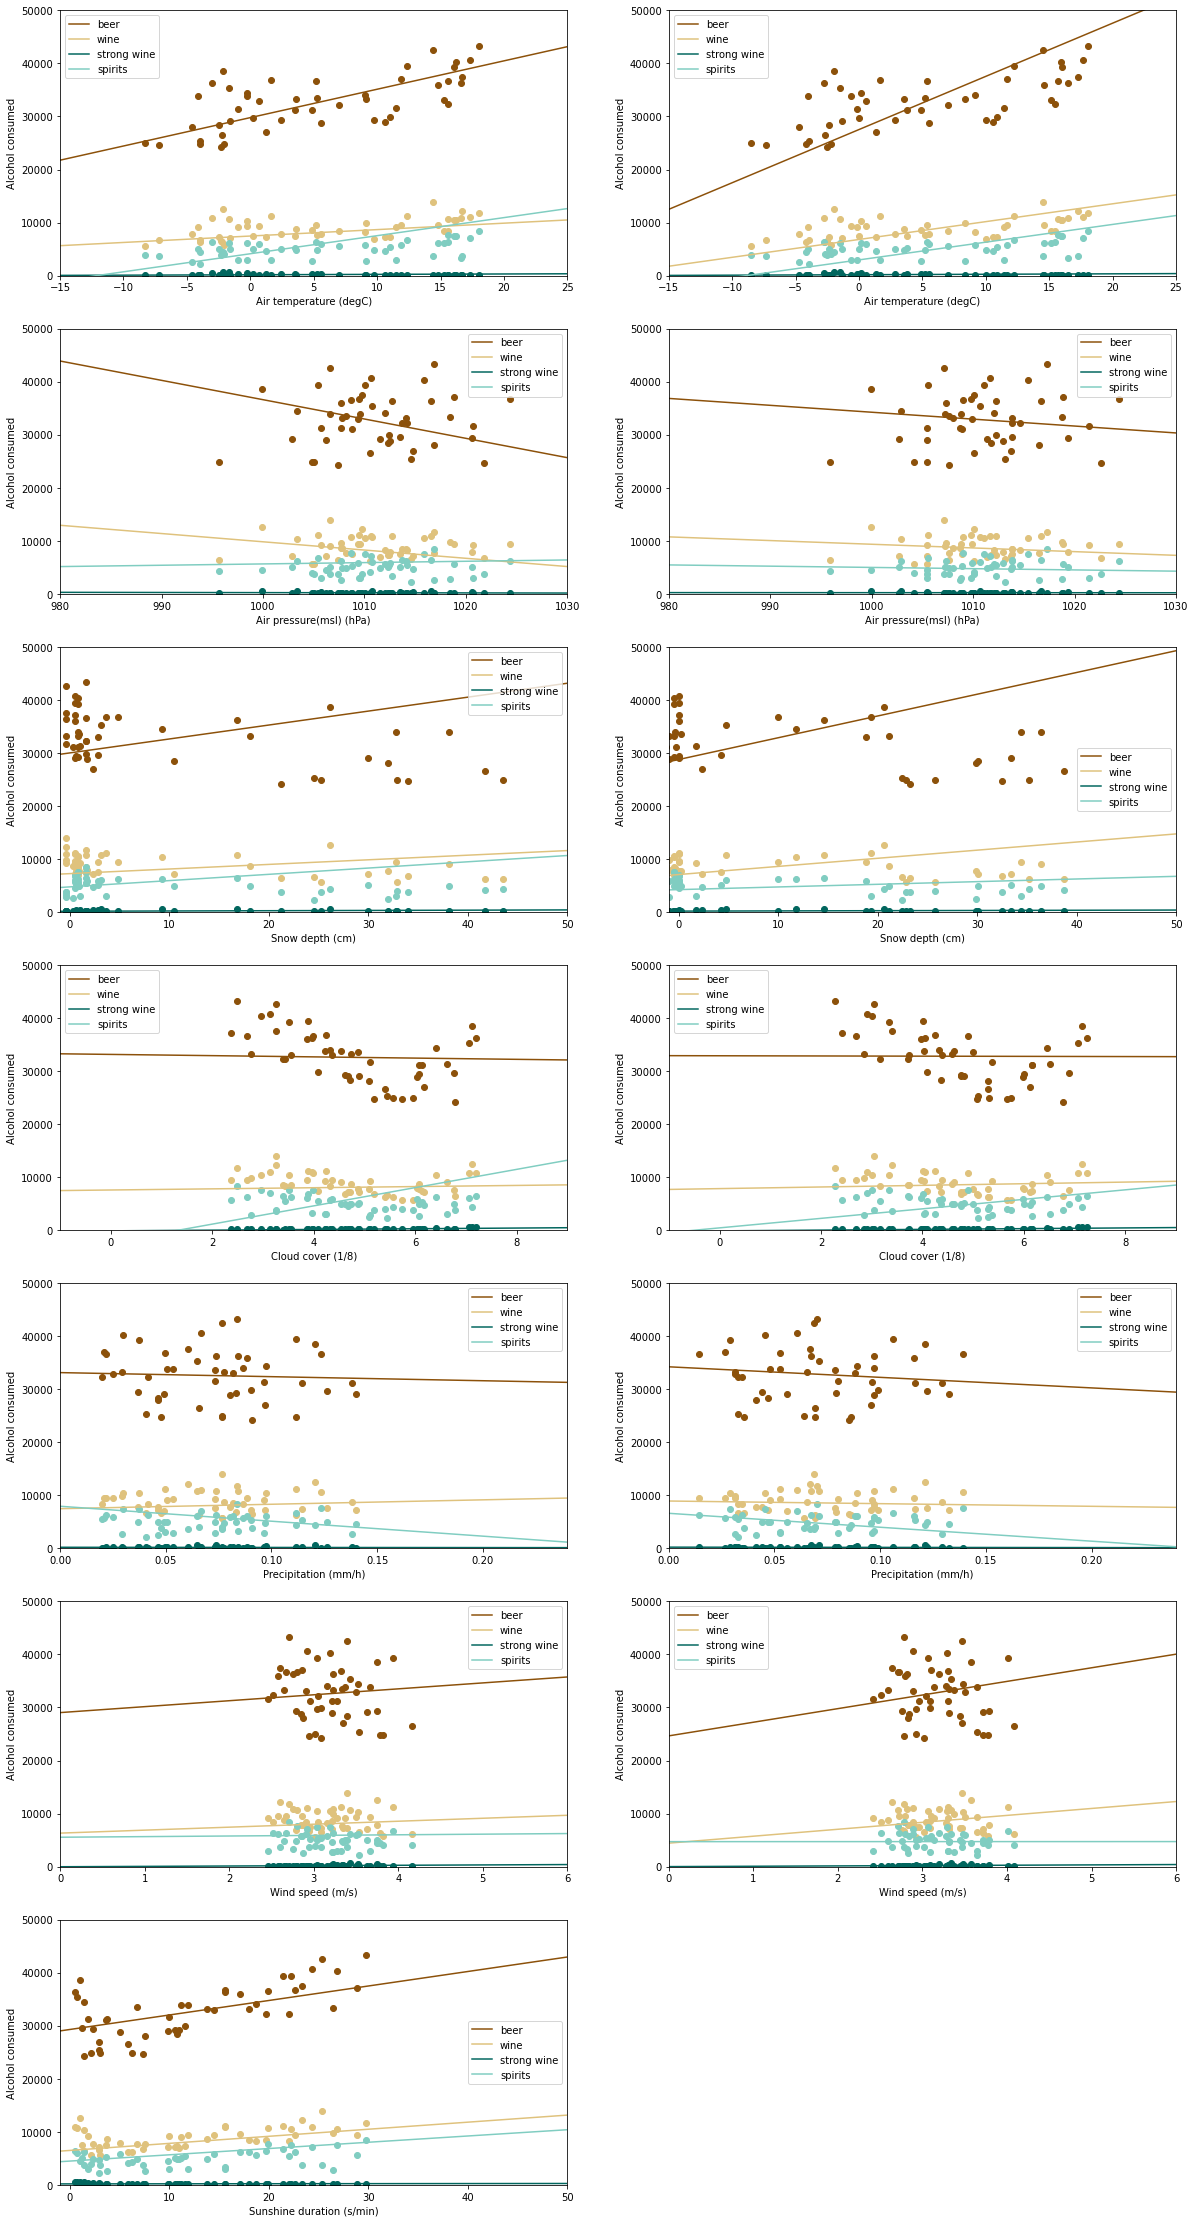

In [20]:
# Alcohol as a function of temperature
def regression_plots(with_sun, plot_number, field, index_distribution):
  beer = linear_regression("Beer", with_sun)
  wine = linear_regression("Wine", with_sun)
  s_wine = linear_regression("Strong Wine", with_sun)
  spirits = linear_regression("Spirits", with_sun)

  beer_p = beer[1]
  wine_p = wine[1]
  s_wine_p = s_wine[1]
  spirits_p = spirits[1]

  color1 = "#8c510a"
  color2 = "#dfc27d"
  color4 = "#80cdc1"
  color3 = "#01665e"

  X, y = process_data_for_lr("Beer", with_sun)
  data = pd.concat([y, X["s"+field]], axis=1)
  plt.scatter(denormalize(data["s"+field], True, field), data["Beer"], color=color1)

  if field == "Air pressure(msl) (hPa)":
    plt.xlim([980, 1030])
  elif field == "Snow depth (cm)":
    plt.xlim([-1, 50])
  elif  field == "Cloud cover (1/8)":
    plt.xlim([-1, 9])
  elif field == "Precipitation (mm/h)":
    plt.xlim([0, 0.24])
  elif field == "Wind speed (m/s)":
    plt.xlim([0, 6])
  elif field =="Sunshine duration (s/min)": 
    plt.xlim([-1, 50])
  else:
    plt.xlim([-15, 25])
  plt.ylim([0, 50000])
  plt.xlabel(field) 
  plt.ylabel("Alcohol consumed")

  X, y = process_data_for_lr("Wine", with_sun)
  data = pd.concat([y, X["s"+field]], axis=1)
  plt.scatter(denormalize(data["s"+field], True, field), data["Wine"], color=color2)

  X, y = process_data_for_lr("Strong Wine", with_sun)
  data = pd.concat([y, X["s"+field]], axis=1)
  plt.scatter(denormalize(data["s"+field], True, field), data["Strong Wine"], color=color3)

  X, y = process_data_for_lr("Spirits", with_sun)
  data = pd.concat([y, X["s"+field]], axis=1)
  plt.scatter(denormalize(data["s"+field], True, field), data["Spirits"], color=color4)

  #plt.scatter(y=[predict_alcohol(alc_type="Beer", temp=10), predict_alcohol(alc_type="Beer", temp=20)], x=[10,20], color="black")
  beer_int, beer_slope = get_values(beer_p, f"Q('s{field}')", index_distribution)
  wine_int, wine_slope = get_values(wine_p, f"Q('s{field}')",index_distribution)
  s_wine_int, s_wine_slope = get_values(s_wine_p, f"Q('s{field}')", index_distribution)
  spirits_int, spirits_slope = get_values(spirits_p, f"Q('s{field}')", index_distribution)

  abline_plot(intercept = beer_int, slope = beer_slope,
      ax=plt.gca(), color=color1, label="beer")
  abline_plot(intercept = wine_int, slope = wine_slope,
      ax=plt.gca(), color=color2, label="wine")
  abline_plot(intercept = s_wine_int, slope = s_wine_slope,
      ax=plt.gca(), color=color3, label="strong wine")
  abline_plot(intercept = spirits_int, slope = spirits_slope,
      ax=plt.gca(), color=color4, label="spirits")

  plt.legend()

plt.figure(figsize=(20,40))
fields = ["Air temperature (degC)","Air pressure(msl) (hPa)","Snow depth (cm)", "Cloud cover (1/8)","Precipitation (mm/h)", "Wind speed (m/s)", "Sunshine duration (s/min)"]
indices_distribution = [4,1,3,0,2,5,6]
plot_number = 1
for (i, field) in enumerate(fields):
  plt.subplot(7,2, plot_number)
  regression_plots(True, plot_number, field, indices_distribution[i])
  plot_number += 1


  if field != "Sunshine duration (s/min)":
    plt.subplot(7,2, plot_number)
    regression_plots(False, plot_number, field, indices_distribution[i])
    plot_number += 1
plt.show()


In [21]:
#Uncomment all CTRL+K+U, Comment everything CTRL+K+C
## https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html
## alcoholdata 2021
# def load_xls2021(file_name:str, year: int):
#     dataframes = []
#     months = ["Tammi", "Helmi", "Maalis", "Huhti", "Touko", "Kesä", "Heinä"]
#     xls = pd.ExcelFile(file_name)
#     for (i, month) in enumerate(months):
#         name_of_sheet = f"{month}kuu {year}"
#         df = pd.read_excel(xls, name_of_sheet,skiprows=[0,1,2], usecols=("I"))
#         # Add month column to the dataframe. For example "Tammikuu2020".
#         df[i+1] = pd.concat([df.iloc[3:4], df.iloc[14:15], df.iloc[21:22], df.iloc[34:35], df.iloc[35:36]])
#         # Drop rows with NaNs. After this we have only four rows containing total consumption for all types of alchohol.
#         df = df.dropna()
#         # Remove the first useless row of the dataframe.
#         df = df.iloc[:, 1:]
#         # Change index names
#         df = df.rename(index={3:"Beer", 14:"Wine", 21:"Strong Wine", 34:"Spirits", 35:"Total"})
#         dataframes.append(df)
#     total = pd.concat(dataframes, axis=1)
    
#     return total.T.astype(int)

# alc_data2021 = load_xls2021("Alkoholimyyntitilasto_tammi_heinakuu_2021.xlsx", 2021)
# alc_data2021.reset_index(drop=True, inplace=True)

# # x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# # Total predictions
# print("Total")
# # X, y = process_data_for_lr("Total", sun=True)
# # df = pd.concat([y, X], axis=1)
# regression = linear_regression("Total", sun=True)[2]
# # x values are the values of the weather conditions
# X = weatherdata_All_2021_SUN.iloc[:7,:]

# pred = regression.predict(X)
# pred = list(pred.values)

# #bdf = pd.DataFrame({"Actual": alc_data2021["Total"], "Predicted":pred})[0:7]
# bdf = pd.DataFrame({"Actual": alc_data2021["Total"], "Predicted":pred, "Difference": pred-alc_data2021["Total"]})
# print(bdf.T.astype(int))

# # Beer predictions
# print("Beer")
# X, y = process_data_for_lr("Beer", sun=True)
# df = pd.concat([y, X], axis=1)
# regression = linear_regression("Beer", sun=True)[2]
# # x values are the values of the weather conditions 
# X = weatherdata_All_2021_SUN.iloc[:7,:]

# pred = regression.predict(X)
# pred = list(pred.values)
# #print(beer_pred)
# #bdf = pd.DataFrame({"Actual": alc_data2021["Beer"], "Predicted":pred})[0:7]
# bdf = pd.DataFrame({"Actual": alc_data2021["Beer"], "Predicted":pred, "Difference": pred-alc_data2021["Beer"]})
# print(bdf.T.astype(int))

# # Wine predictions
# print("Wine")
# X, y = process_data_for_lr("Wine", sun=True)
# df = pd.concat([y, X], axis=1)
# regression = linear_regression("Wine", sun=True)[2]
# # x values are the values of the weather conditions 
# X = weatherdata_All_2021_SUN.iloc[:7,:]

# pred = regression.predict(X)
# pred = list(pred.values)
# #print(beer_pred)
# #bdf = pd.DataFrame({"Actual": alc_data2021["Wine"], "Predicted":pred})[0:7]
# bdf = pd.DataFrame({"Actual": alc_data2021["Wine"], "Predicted":pred, "Difference": pred-alc_data2021["Wine"]})
# print(bdf.T.astype(int))

# # Strong Wine predictions
# print("Strong Wine")
# X, y = process_data_for_lr("Strong Wine", sun=True)
# df = pd.concat([y, X], axis=1)
# regression = linear_regression("Strong Wine", sun=True)[2]
# # x values are the values of the weather conditions 
# X = weatherdata_All_2021_SUN.iloc[:7,:]

# pred = regression.predict(X)
# pred = list(pred.values)
# #print(beer_pred)
# #bdf = pd.DataFrame({"Actual": alc_data2021["Strong Wine"], "Predicted":pred})[0:7]
# bdf = pd.DataFrame({"Actual": alc_data2021["Strong Wine"], "Predicted":pred, "Difference": pred-alc_data2021["Strong Wine"]})
# print(bdf.T.astype(int))

# # Spirits predictions
# print("Spirits")
# X, y = process_data_for_lr("Spirits", sun=True)
# df = pd.concat([y, X], axis=1)
# regression = linear_regression("Spirits", sun=True)[2]
# # x values are the values of the weather conditions 
# X = weatherdata_All_2021_SUN.iloc[:7,:]

# pred = regression.predict(X)
# pred = list(pred.values)
# #print(beer_pred)
# #bdf = pd.DataFrame({"Actual": alc_data2021["Spirits"], "Predicted":pred})[0:7]
# bdf = pd.DataFrame({"Actual": alc_data2021["Spirits"], "Predicted":pred, "Difference": pred-alc_data2021["Spirits"]})
# print(bdf.T.astype(int))


# print("Without sun")
# def predict_without_sunshine(alc_type):
#   regression = linear_regression(alc_type, False)[2]
#   # x values are the values of the weather conditions 
#   X = weatherdata_All_2021.iloc[:7,:]

#   pred = regression.predict(X)
#   pred = list(pred.values)
#   #print(beer_pred)
#   bdf = pd.DataFrame({"Actual": alc_data2021[alc_type], "Predicted":pred, "Difference": pred-alc_data2021[alc_type]})
#   print(bdf.T.astype(int))

# types = ["Total", "Beer", "Wine", "Strong Wine", "Spirits"]
# for alc_type in types:
#   predict_without_sunshine(alc_type)

# Predictions for the year 2021
<span style="font-family:Arial; font-size:14px;">Predictions for alcohol consumption were made using each of the models presented above. In each of the tables below, actual values for alcohol consumption were taken from alcohol data for the year 2021 (Valvira). For the predictions, we used weather data from year 2021. The Difference row shows how much more (positive sign) or how much less (negative sign) the predicted alcohol consumption was when compared to actual value of consumed alcohol for each of the given months. All of the values are in litres.</span>

<span style="font-family:Arial; font-size:14px;">From the prediction results, it can be seen that some of the predictions were within a reasonable distance from actual values. However, all of the models have some monthly prediction values that differ more from the actual values. In the future, adjustments can be made in order to increase the accuracy of the model.</span>

<span style="font-family:Arial; font-size:14px;">Predictions over the total alcohol consumption. Both of the models could still be improved when it comes to their predictions. However, for some months, such as February and March, the prediction is close to the actual consumption when the model without the variable sunshine duration is used. </span>

<table>
<tr><th width=500>Total with Sunshine Duration</th><th width=500>Total without Sunshine Duration</th></tr>
<tr><td>
  <table>
  <tr><th></th><th>Jan</th><th>Feb</th><th>Mar</th><th>Apr</th><th> May</th><th>Jun</th><th>Jul</th></tr> 
  <tr><td><strong>Actual</strong></td><td>29847</td><td>34427</td><td>41864</td><td>46011</td><td>44560</td><td>62949</td><td>57062</td></tr>
  <tr><td><strong>Predicted</strong></td><td>46051</td><td>40048</td><td>45775</td><td>49151</td><td>55278 </td><td> 52735</td><td>53883</td></tr>
  <tr><td><strong>Difference</strong></td><td>16204</td><td>5621</td><td>3911</td><td>3140</td><td>10718</td><td>-10213</td><td>-3178</td></tr>
  </table>
</td><td>
  <table>
  <tr><th></th><th>Jan</th><th>Feb</th><th>Mar</th><th>Apr</th><th>May</th><th>Jun</th><th>Jul</th></tr>
  <tr><td><strong>Actual</strong></td><td>29847</td><td>34427</td><td>41864</td><td>46011</td><td>44560</td><td>62949</td><td>57062</td></tr>
  <tr><td><strong>Predicted</strong></td><td>44905</td><td> 34088</td><td> 42650</td><td>42875</td><td> 48437</td><td>51353</td><td>51825</td></tr>
  <tr><td><strong>Difference</strong></td><td>15058 </td><td>-338</td><td>-786</td><td>-3135</td><td>3877</td><td>-11595</td><td>-5236</td></tr>
  </table>
</td></tr>
</table>

<span style="font-family:Arial; font-size:14px;">For the models Beer for most of the months predicted value can be tolerated. Again model without Sunshine Duration proved better prediction.</span>

<table>
<tr><th width=500>Beer with Sunshine Duration</th><th width=500>Beer without Sunshine Duration</th></tr>
<tr><td style="horizontal-align: center;">
  <table>
  <tr><th></th><th>Jan</th><th>Feb</th><th>Mar</th><th>Apr</th><th> May</th><th>Jun</th><th>Jul</th></tr>
  <tr><td><strong>Actual</strong></td><td> 20439</td><td>23842</td><td>28719</td><td>31072</td><td>29960</td><td>41961</td><td>37096</td></tr>
  <tr><td><strong>Predicted</strong></td><td> 31399</td><td>27085 </td><td>31822</td><td>33752 </td><td>37651</td><td>36069</td><td>37532</td></tr>
    <tr><td><strong>Difference</strong></td><td>10960 </td><td>3243 </td><td>3103  </td><td>2680 </td><td>7691 </td><td>-5891 </td><td>436</td></tr>
  </table>
</td><td style="horizontal-align: center;">
  <table>
  <tr><th></th><th>Jan</th><th>Feb</th><th>Mar</th><th>Apr</th><th> May</th><th>Jun</th><th>Jul</th></tr>
  <tr><td><strong>Actual</strong></td><td> 20439</td><td>23842</td><td>28719</td><td>31072</td><td>29960</td><td>41961</td><td>37096</td></tr>
  <tr><td><strong>Predicted</strong></td><td> 30914</td><td>24689</td><td>30092 </td><td>30433 </td><td>33700</td><td>35884 </td><td>36292</td></tr>
  <tr><td><strong>Difference</strong></td><td> 10475 </td><td> 847 </td><td>1373 </td><td>-638 </td><td>3740 </td><td>-6076 </td><td>-803</td></tr>
  </table>
</td></tr> </table>




<span style="font-family:Arial; font-size:14px;">Both models some good months</span>



<table>
<tr><th width=500>Wine with Sunshine Duration</th><th width=500>Wine without Sunshine Duration</th></tr>
<tr><td style="horizontal-align: center;">
  <table>
  <tr><th></th><th>Jan</th><th>Feb</th><th>Mar</th><th>Apr</th><th> May</th><th>Jun</th><th>Jul</th></tr>
  <tr><td><strong>Actual</strong></td><td>5590 </td><td> 6220</td><td>7833</td><td>8945</td><td>7681</td><td>11282 </td><td>10838</td></tr>
  <tr><td><strong>Predicted</strong></td><td>8905 </td><td>6658  </td><td> 8663 </td><td>9003 </td><td>9505</td><td> 9141 </td><td> 10458</td></tr>
  <tr><td><strong>Difference</strong></td><td> 3315 </td><td>438  </td><td>830  </td><td>58  </td><td>1824</td><td> -2140  </td><td> -379</td></tr>
  </table>
</td><td style="horizontal-align:center;">
  <table>
  <tr><th></th><th>Jan</th><th>Feb</th><th>Mar</th><th>Apr</th><th> May</th><th>Jun</th><th>Jul</th></tr> 
  <tr><td><strong>Actual</strong></td><td>5590 </td><td> 6220</td><td>7833</td><td>8945</td><td>7681</td><td>11282 </td><td>10838</td></tr>
  <tr><td><strong>Predicted</strong></td><td> 8950 </td><td> 6201</td><td>8029</td><td>7737</td><td>8828</td><td>9301</td><td>9435</td></tr>
  <tr><td><strong>Difference</strong></td><td>3360</td><td>  -18 </td><td>196</td><td> -1207</td><td>1147 </td><td> -1980 </td><td> -1402</td></tr>
  </table>
</td></tr> </table>




<span style="font-family:Arial; font-size:14px;">Both models provides results, which are promising in some months, but not all</span>



<table>
<tr><th width=500>Strong Wine with Sunshine Duration</th><th width=500>Strong Wine without Sunshine Duration</th></tr>
<tr><td style="horizontal-align:: center;">
  <table>
  <tr><th></th><th>Jan</th><th>Feb</th><th>Mar</th><th>Apr</th><th> May</th><th>Jun</th><th>Jul</th></tr>
  <tr><td><strong>Actual</strong></td><td> 132</td><td>137 </td><td> 150</td><td>146</td><td> 128</td><td> 143 </td><td> 144</td></tr>
  <tr><td><strong>Predicted</strong></td><td>395</td><td>286 </td><td> 266</td><td> 269</td><td> 241 </td><td>102</td><td>147</td></tr>
  <tr><td><strong>Difference</strong></td></td><td> 263</td><td>149</td><td> 116  </td><td>123  </td><td> 113 </td><td>-40 </td><td>3</td></tr>
  </table>
</td><td style="horizontal-align:center;">
  <table>
  <tr><th></th><th>Jan</th><th>Feb</th><th>Mar</th><th>Apr</th><th> May</th><th>Jun</th><th>Jul</th></tr>
  <tr><td><strong>Actual</strong></td><td> 132</td><td>137</td><td>150 </td><td>146 </td><td>128</td><td>143</td><td>144</td></tr>
  <tr><td><strong>Predicted</strong></td><td>392</td><td>212 </td><td> 209 </td><td>191 </td><td>245</td><td>153</td><td>108</td></tr>
  <tr><td><strong>Difference</strong></td><td>260</td><td> 75 </td><td>59 </td><td>45 </td><td>117</td><td>10</td><td> -35</td></tr>
  </table>
</td></tr> 
</table>




<span style="font-family:Arial; font-size:14px;">Some months are fine most not.</span>


<table>
<tr><th width=450>Spirits with Sunshine Duration</th><th width=450>Spirits without Sunshine Duration</th></tr>
<tr><td style="horizontal-align: center;">
  <table>
  <tr><th></th><th>Jan</th><th>Feb</th><th>Mar</th><th>Apr</th><th> May</th><th>Jun</th><th>Jul</th></tr>
  <tr><td>Actual</td><td>3685</td><td>4227</td><td>5162</td><td>5848</td><td>6790</td><td>9562</td><td>8984</td></tr>
  <tr><td>Predicted</td><td>5350</td><td>6016</td><td>5022</td><td>6126</td><td>7880</td><td>7422</td><td>5746</td></tr>
  <tr><td>Difference</td><td>1665 </td><td> 1789</td><td>-139</td><td>278</td><td>1090</td><td>-2139 </td><td>-3237</td></tr>
  </table>
</td><td style="horizontal-align:center;">
  <table>
  <tr><th></th><th>Jan</th><th>Feb</th><th>Mar</th><th>Apr</th><th> May</th><th>Jun</th><th>Jul</th></tr>
  <tr><td>Actual</td><td>3685</td><td>4227</td><td>5162</td><td>5848</td><td>6790</td><td>9562</td><td>8984</td></tr>
  <tr><td>Predicted</td><td>4647</td><td>2984</td><td>4318</td><td>4512</td><td>5664</td><td>6013</td><td>5990</td></tr>
  <tr><td>Difference</td><td>  962</td><td>-1242</td><td>-843</td><td>-1335</td><td>-1125</td><td>-3548</td><td>-2993</td></tr>
  </table>
</td></tr>
</table>



## Conclusions and Future Works

<span style="font-family:Arial; font-size:14px;">We can see some promising results for predictability with the Air Temperature feature according to the linear regression graphs, but the general model produced gives both good and bad predictions, being consistently more accurate when the sunshine feature is controlled out.</span>

<span style="font-family:Arial; font-size:14px;">In the future, more cities could be included to expand the scale of the project, which would achieve a more comprehensive look of Finland as a whole, or the alcohol data used could be city specific.</span>

<span style="font-family:Arial; font-size:14px;">Thank you for reading!</span>